In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set figure size, line width, and tick label size
plt.rcParams['figure.figsize'] = [10, 7]
plt.rcParams['lines.linewidth'] = 2.5
plt.rcParams['xtick.labelsize'] = 'x-large'
plt.rcParams['ytick.labelsize'] = 'x-large'

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [5]:
#mengecek spasi kosong
df.eq('').sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
df.shape

(1470, 35)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### Pengamatan:

- Data terdiri dari 1470 baris <br>
- Tidak ada data yang NULL/Missing Value <br>
- Sepertinya tidak ada issue yang mencolok pada tipe data untuk setiap kolom (sudah sesuai)<br>

In [8]:
#Mendefinisikan kolom yang di analisis
nums = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 
        'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome','MonthlyRate', 'NumCompaniesWorked', 
        'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 
        'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
cats = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender','JobRole', 'MaritalStatus', 'Over18', 'OverTime']

In [9]:
#df.select_dtypes('int').columns

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [11]:
df.describe().loc[['mean', '50%']].T

,mean,50%
Age,36.923810,36.0
DailyRate,802.485714,802.0
DistanceFromHome,9.192517,7.0
Education,2.912925,3.0
EmployeeCount,1.000000,1.0
EmployeeNumber,1024.865306,1020.5
EnvironmentSatisfaction,2.721769,3.0
HourlyRate,65.891156,66.0
JobInvolvement,2.729932,3.0
JobLevel,2.063946,2.0


In [12]:
df[cats].head(5)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [13]:
df[cats].describe()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


Observasi :

Beberapa kolom numerik skew (dilihat dari perbedaan yang besar antara mean dan median) seperti `MonthlyIncome` <br>
Jika diperhatikan terdapat 2 kolom yang hanya memiliki 1 nilai sehingga kedepan bisa di drop yaitu `StandardHours` dan `Over18`

### Cek Duplikat

In [14]:
df.duplicated().any()

False

### Cek data NULL

In [15]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [16]:
#melihat unique value di setiap kolom bertipe object
for col in cats:
    unique_values = df[col].unique()
    print('Column:', col)
    print('Unique values:', list(unique_values))
    print()

Column: Attrition
Unique values: ['Yes', 'No']

Column: BusinessTravel
Unique values: ['Travel_Rarely', 'Travel_Frequently', 'Non-Travel']

Column: Department
Unique values: ['Sales', 'Research & Development', 'Human Resources']

Column: EducationField
Unique values: ['Life Sciences', 'Other', 'Medical', 'Marketing', 'Technical Degree', 'Human Resources']

Column: Gender
Unique values: ['Female', 'Male']

Column: JobRole
Unique values: ['Sales Executive', 'Research Scientist', 'Laboratory Technician', 'Manufacturing Director', 'Healthcare Representative', 'Manager', 'Sales Representative', 'Research Director', 'Human Resources']

Column: MaritalStatus
Unique values: ['Single', 'Married', 'Divorced']

Column: Over18
Unique values: ['Y']

Column: OverTime
Unique values: ['Yes', 'No']



Observasi :

Tidak terdapat data `duplikat` <br>
Setiap kolom tidak memiliki niali `NULL`

# VIsualization

In [17]:
df_a = df.groupby('Attrition').size().reset_index(name='Jumlah')
df_a['Jumlah'] = df_a['Jumlah'].apply(lambda x: f'{(x/len(df)) * 100:.2f}%')
df_a


,Attrition,Jumlah
0,No,83.88%
1,Yes,16.12%


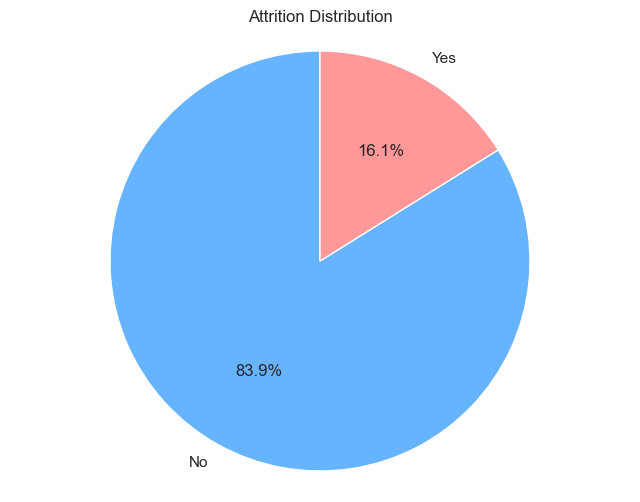

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting a pie chart for attrition
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
df_attrition = df['Attrition'].value_counts()
labels = df_attrition.index
plt.pie(df_attrition, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title("Attrition Distribution")
plt.axis('equal')
plt.show()


### Gender

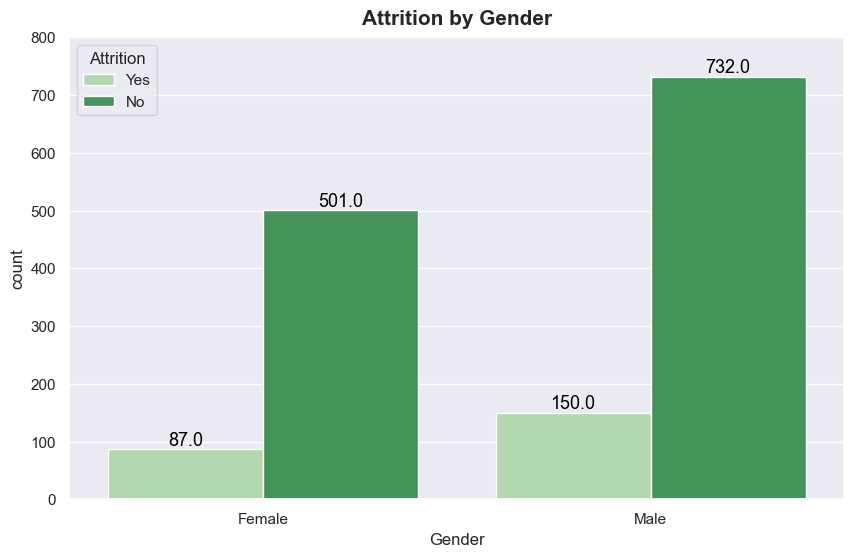

In [19]:
plt.figure(figsize=(10,6))
ax=sns.countplot(x='Gender', hue='Attrition',   data=df, palette='Greens')
plt.ylim(0,800)
plt.title('Attrition by Gender', fontsize=15, weight='bold', y=1.01)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=13, color='black')

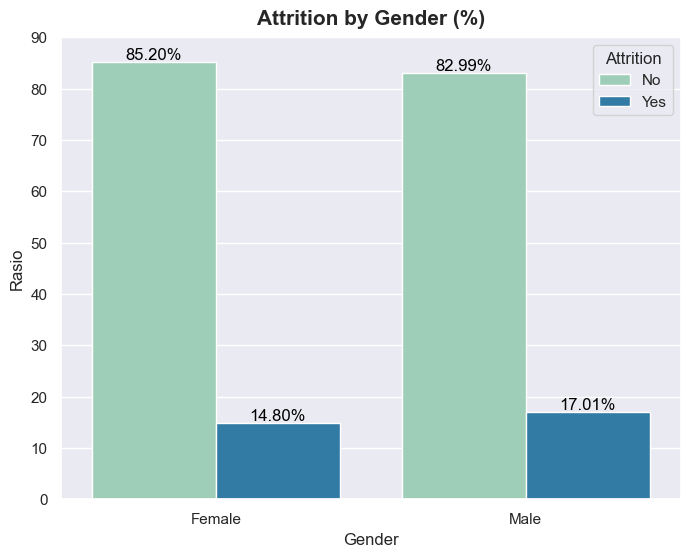

In [20]:
df_group = df.groupby('Gender').size().reset_index(name='Total')
df_group1=df.groupby(['Gender','Attrition']).size().reset_index(name='Jumlah')
df_gab = df_group1.merge(df_group, on='Gender', how='left')
df_gab['Rasio']= round((df_gab['Jumlah']/df_gab['Total'])*100, 2)

plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df_gab, x='Gender', y='Rasio', hue='Attrition', palette='YlGnBu')
plt.title('Attrition by Gender (%)', fontsize=15, weight='bold', y=1.01)
plt.ylim(0,90)


#memberikan label value otomatis
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=12, color='black')
       

plt.show()


Secara jumlah, jenis kelamin laki-laki lebih banyak yang memutuskan keluar, diperjelas juga dengan proporsi pada masing-masing jenis kelamin, meski begitu selisihnya tidak terlalu jauh hanya sekitar >2% untuk yang memutuskan keluar

### Department

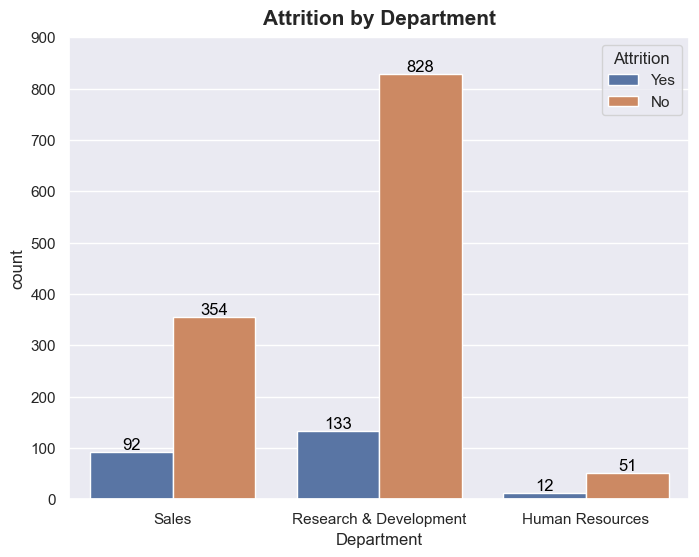

In [21]:
#melihat jumlah yang keluar berdasarkan department
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='Department', hue='Attrition')
plt.ylim(0,900)
plt.title('Attrition by Department', fontsize=15, weight='bold', y=1.01)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=12, color='black')
    
plt.show()

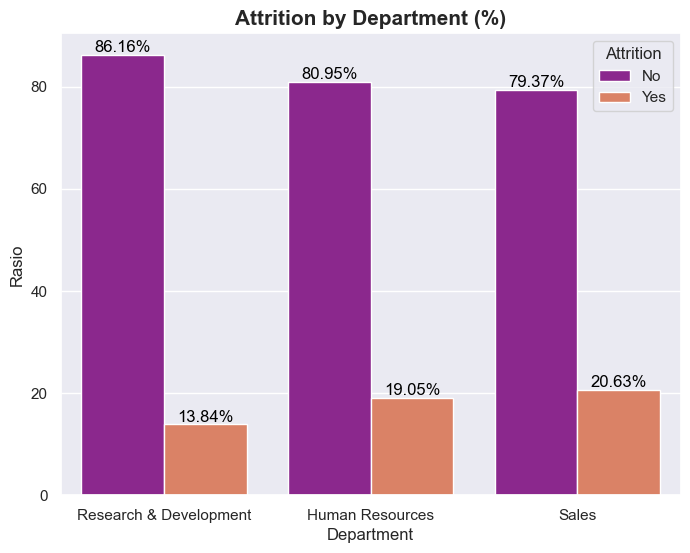

In [22]:
#mencari Rasio setiap departemen yang keluar dan bertahan

df_group = df.groupby('Department').size().reset_index(name='Total')
df_group1=df.groupby(['Department','Attrition']).size().reset_index(name='Jumlah')
df_gab = df_group1.merge(df_group, on='Department', how='left')
df_gab['Rasio']= round((df_gab['Jumlah']/df_gab['Total'])*100, 2)
df_gab = df_gab.sort_values('Rasio', ascending=False)

plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df_gab, x='Department', y='Rasio', hue='Attrition', palette='plasma')
plt.title('Attrition by Department (%)', weight='bold', fontsize=15)
#memberikan label value otomatis
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=12, color='black')
       

plt.show()


Jika diperhatikan, dep R&D lebih banyak yang keluar, namun jika dibandingkan ternyata secara proporsi dep Sales lebih banyak yang keluar

### JobRole

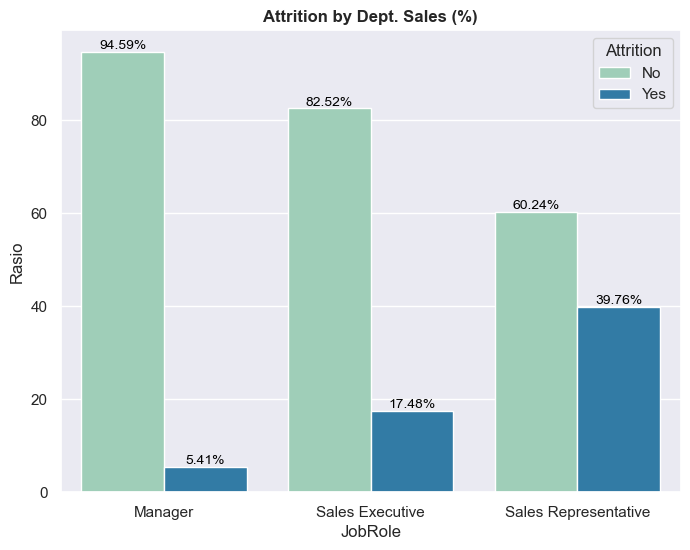

In [23]:
#seleksi data sales saja
dfh = df[df['Department']=='Sales']

#group data
df_group = dfh.groupby('JobRole').size().reset_index(name='Total')
df_group1=dfh.groupby(['JobRole','Attrition']).size().reset_index(name='Jumlah')
df_gab1 = df_group1.merge(df_group, on='JobRole', how='left')
df_gab1['Rasio']= round((df_gab1['Jumlah']/df_gab1['Total'])*100, 2)

#plot data
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df_gab1, x='JobRole', y='Rasio', hue='Attrition', palette='YlGnBu')
plt.title('Attrition by Dept. Sales (%)', weight='bold')

#memberikan label value otomatis
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10, color='black')
       
plt.show()

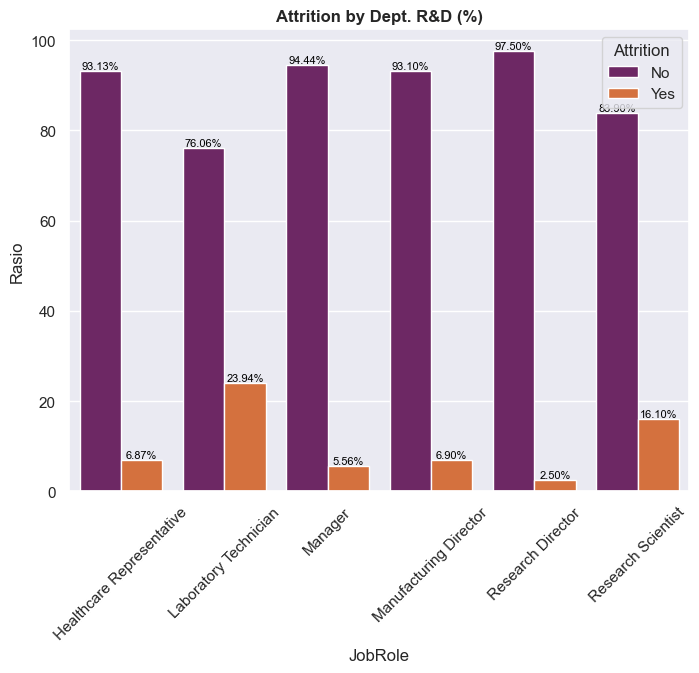

In [24]:
#seleksi data 
dfg = df[df['Department']=='Research & Development']

#group data
df_group = dfg.groupby('JobRole').size().reset_index(name='Total')
df_group1=dfg.groupby(['JobRole','Attrition']).size().reset_index(name='Jumlah')
df_gab = df_group1.merge(df_group, on='JobRole', how='left')
df_gab['Rasio']= round((df_gab['Jumlah']/df_gab['Total'])*100, 2)

#plot data
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df_gab, x='JobRole', y='Rasio', hue='Attrition', palette='inferno')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title('Attrition by Dept. R&D (%)', weight='bold')

#memberikan label value otomatis
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=8, color='black')
       
plt.show()

Setelah di bedah lagi, ternyata dep Sales yang paling banyak keluar ada pada role job sebagai Sales Representative, sedangkan untuk R&D ada pada Laboratory Technician

### Distance From Home & Years At Company

In [25]:
dfc=df.groupby('Attrition', as_index=False)['DistanceFromHome'].mean()
dfc['DistanceFromHome'] = dfc['DistanceFromHome'].apply(lambda x: round(x,2))
dfc


,Attrition,DistanceFromHome
0,No,8.92
1,Yes,10.63


In [26]:
dfb=df.groupby('Attrition', as_index=False)['YearsAtCompany'].mean()
dfb['YearsAtCompany'] = dfb['YearsAtCompany'].apply(lambda x: round(x,2))
dfb

,Attrition,YearsAtCompany
0,No,7.37
1,Yes,5.13


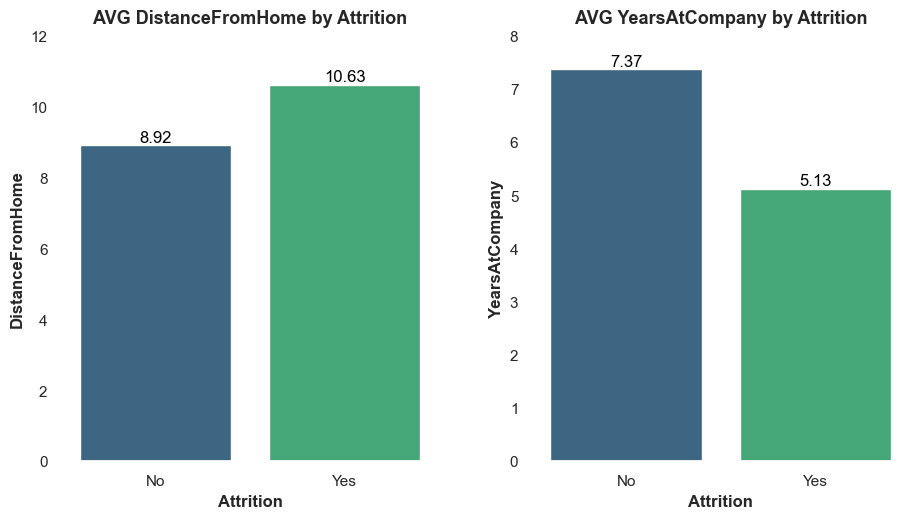

In [118]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

# Grafik average tenure by status
sns.barplot(data=dfc, x='Attrition', y='DistanceFromHome', ax=ax[0], palette='viridis')
ax[0].set_xlabel('Attrition', fontsize=12, weight='bold')
ax[0].set_ylabel('DistanceFromHome', fontsize=12, weight='bold')
ax[0].set_title('AVG DistanceFromHome by Attrition', fontsize=13, weight='bold', y=1.01)
ax[0].set_ylim(0, 12)
ax[0].set_facecolor('white')  # Mengubah latar belakang tabel menjadi putih

for p in ax[0].patches:
    height = p.get_height()
    ax[0].annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=12, color='black')

# Grafik average monthly charges by status
sns.barplot(data=dfb, x='Attrition', y='YearsAtCompany', ax=ax[1], palette='viridis')
ax[1].set_xlabel('Attrition', fontsize=12, weight='bold')
ax[1].set_ylabel('YearsAtCompany', fontsize=12, weight='bold')
ax[1].set_title('AVG YearsAtCompany by Attrition', fontsize=13, weight='bold', y=1.01)
ax[1].set_ylim(0, 8)
ax[1].set_facecolor('white')  # Mengubah latar belakang tabel menjadi putih

for p in ax[1].patches:
    height = p.get_height()
    ax[1].annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=12, color='black')

fig.tight_layout(pad=3.0)
plt.show()


- Rata-rata jarak dari rumah menuju ke kantor ternyata berpengaruh terhdapa keputusan untuk keluar dari perushaan
- Lamanya bekerja karywana yang keluar rata-rata sekitar > 5tahun

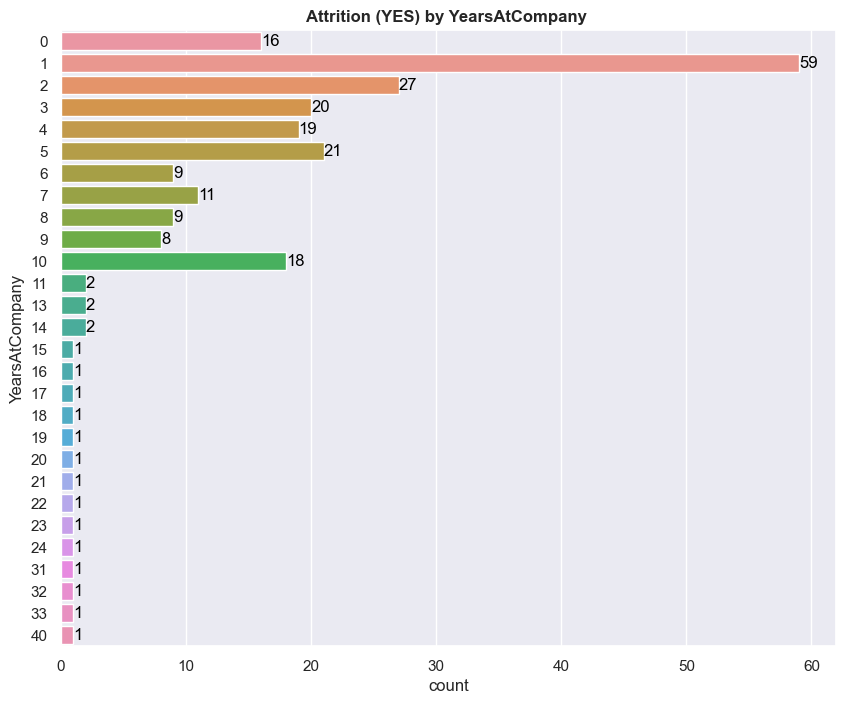

In [124]:
#melihat pada tahun berapa karywana banyak yang kelaur
asd = df[df['Attrition'] == 'Yes']

plt.figure(figsize=(10,8))
ax = sns.countplot(data=asd, y='YearsAtCompany')
plt.title('Attrition (YES) by YearsAtCompany ', weight='bold')
#plt.legend(title='Attrition - Yes')

for p in ax.patches:
    width = p.get_width()  # Menggunakan width daripada height
    x, y = p.get_xy()  # Mengambil koordinat x dan y
    ax.text(x + width, y + p.get_height() / 2, f'{int(width)}',  # Menempatkan label di ujung kanan setiap bar
            ha='left', va='center', fontsize=12, color='black')
    
plt.show()

Pada tahun 0-5 tahun, karyawan paling banyak yang keluar, dan pada tahun pertama ternyata sudah banyak karywana baru yang memutuskan untuk langsung resign

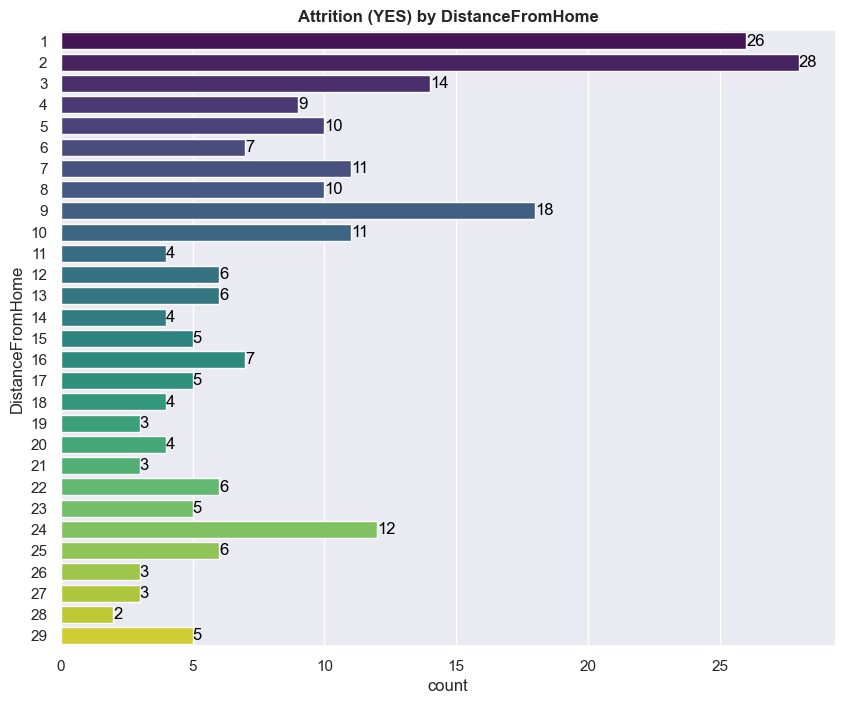

In [29]:
#melihat jarak setiap karywaan yang memututskan keluar
asd = df[df['Attrition'] == 'Yes']

plt.figure(figsize=(10,8))
ax=sns.countplot(data=asd, y='DistanceFromHome', palette='viridis')
plt.title('Attrition (YES) by DistanceFromHome', weight='bold')

for p in ax.patches:
    width = p.get_width()  # Menggunakan width daripada height
    x, y = p.get_xy()  # Mengambil koordinat x dan y
    ax.text(x + width, y + p.get_height() / 2, f'{int(width)}',  # Menempatkan label di ujung kanan setiap bar
            ha='left', va='center', fontsize=12, color='black')

plt.show()

Jarak rumah setiap karyawan yang memutuskan keluar lumayan bervariasi, jarak 1-2 KM paling banyak yang keluar.

### JobSatisfaction

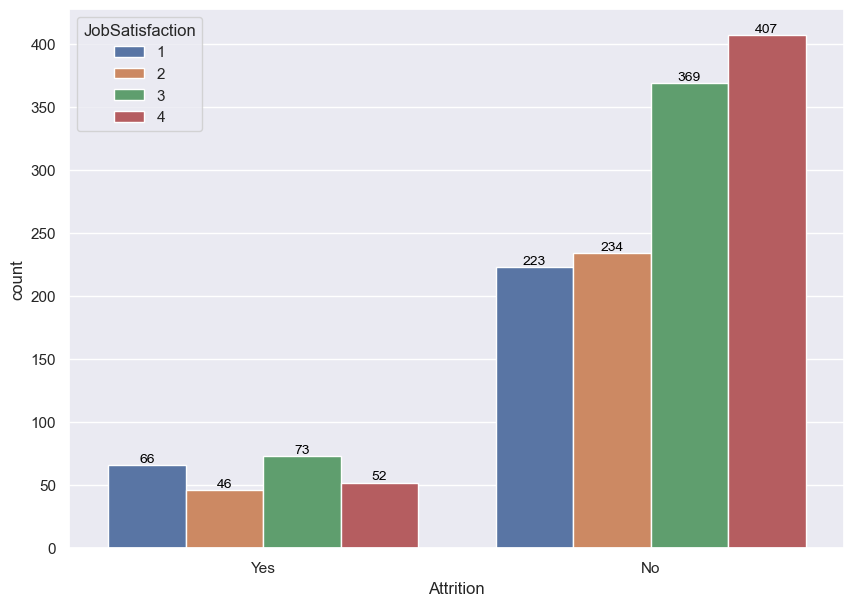

In [30]:
ax = sns.countplot(x='Attrition', hue='JobSatisfaction', data=df, palette='deep')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10, color='black')
plt.show()

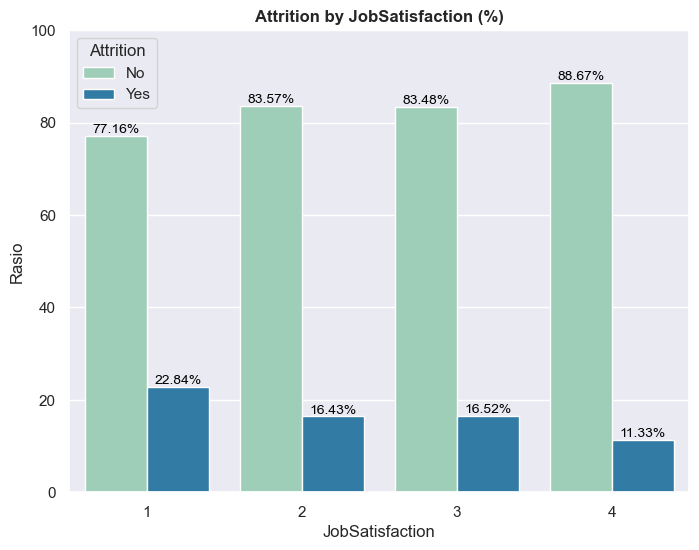

In [31]:
df_group = df.groupby('JobSatisfaction').size().reset_index(name='Total')
df_group1=df.groupby(['JobSatisfaction','Attrition']).size().reset_index(name='Jumlah')
df_gab = df_group1.merge(df_group, on='JobSatisfaction', how='left')
df_gab['Rasio']= round((df_gab['Jumlah']/df_gab['Total'])*100, 2)

plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df_gab, x='JobSatisfaction', y='Rasio', hue='Attrition', palette='YlGnBu')
plt.title('Attrition by JobSatisfaction (%)', weight='bold')
plt.ylim(0,100)

#memberikan label value otomatis
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10, color='black')
       
plt.show()

Kenyamaan karyawan berpengaruh disini, bisa dilihat bahwa semakin kecil rating yang dipilih maka makin besar kecendrungan karyawan untuk memutuskan keluar dari perusahaan

### EnvironmentSatisfaction

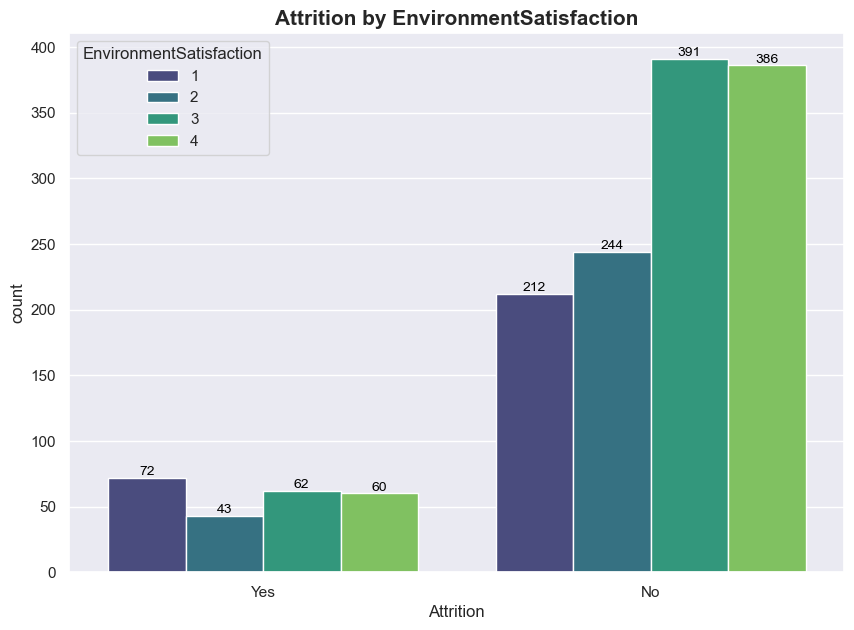

In [32]:
ax=sns.countplot(x='Attrition', hue='EnvironmentSatisfaction', data=df, palette='viridis')
plt.title('Attrition by EnvironmentSatisfaction', fontsize=15, weight='bold')
#memberikan label value otomatis
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10, color='black')
plt.show()

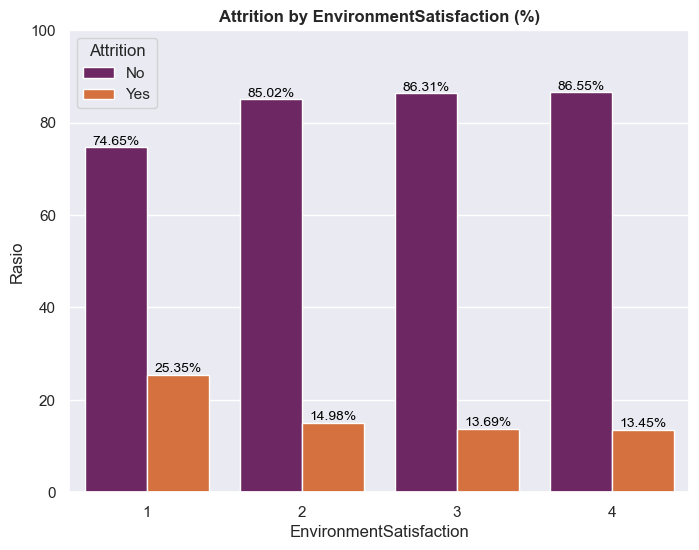

In [33]:
df_group = df.groupby('EnvironmentSatisfaction').size().reset_index(name='Total')
df_group2=df.groupby(['EnvironmentSatisfaction','Attrition']).size().reset_index(name='Jumlah')
df_gab2 = df_group2.merge(df_group, on='EnvironmentSatisfaction', how='left')
df_gab2['Rasio']= round((df_gab2['Jumlah']/df_gab2['Total'])*100, 2)

plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df_gab2, x='EnvironmentSatisfaction', y='Rasio', hue='Attrition', palette='inferno')
plt.title('Attrition by EnvironmentSatisfaction (%)', weight='bold')
plt.ylim(0,100)

#memberikan label value otomatis
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10, color='black')
       
plt.show()

In [98]:
df_gab2

,EnvironmentSatisfaction,Attrition,Jumlah,Total,Rasio
0,1,No,212,284,74.65
1,1,Yes,72,284,25.35
2,2,No,244,287,85.02
3,2,Yes,43,287,14.98
4,3,No,391,453,86.31
5,3,Yes,62,453,13.69
6,4,No,386,446,86.55
7,4,Yes,60,446,13.45


Karyawan yang memilih rating 1 untuk enviromentsatisfaction cenderung lebih banyak untuk memutuskan keluar dari perusahaan

### PerformanceRating

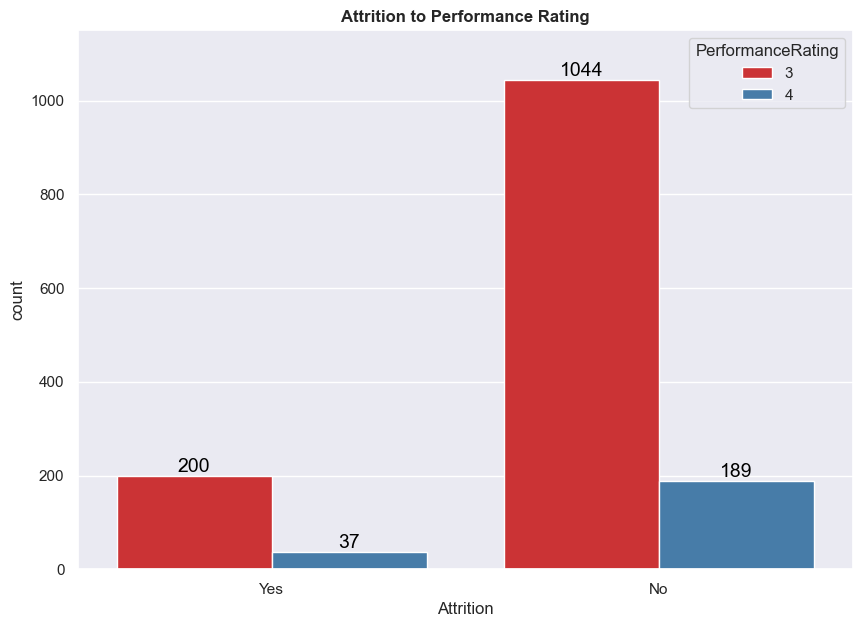

In [34]:
ax = sns.countplot(x='Attrition', hue='PerformanceRating', data=df, palette='Set1')
plt.title('Attrition to Performance Rating', weight='bold')
plt.ylim(0,1150)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=14, color='black')

plt.show()


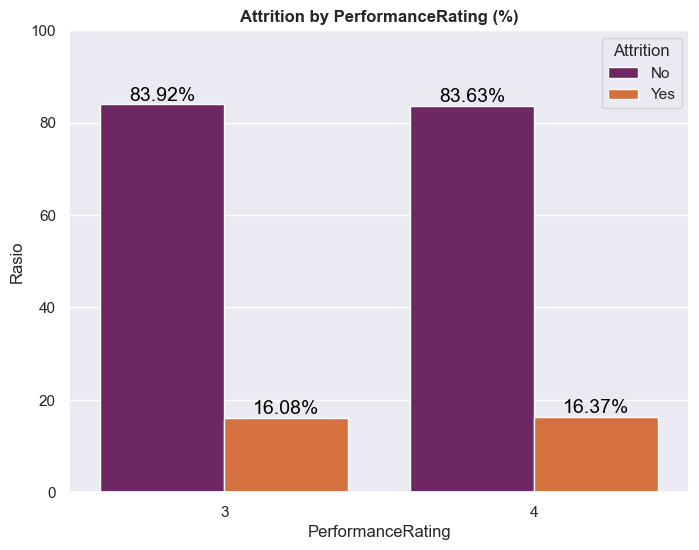

In [35]:
df_group = df.groupby('PerformanceRating').size().reset_index(name='Total')
df_group3=df.groupby(['PerformanceRating','Attrition']).size().reset_index(name='Jumlah')
df_gab3 = df_group3.merge(df_group, on='PerformanceRating', how='left')
df_gab3['Rasio']= round((df_gab3['Jumlah']/df_gab3['Total'])*100, 2)

plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df_gab3, x='PerformanceRating', y='Rasio', hue='Attrition', palette='inferno')
plt.title('Attrition by PerformanceRating (%)', weight='bold')
plt.ylim(0,100)

#memberikan label value otomatis
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=14, color='black')
       
plt.show()

Untuk performa rating 3 dan 4 cenderung menghasilkan nilai yang sama, artinya bahwa rating tidak terlalu berpengaruh dan akan di drop pada proses selanjutnya

### OverTime

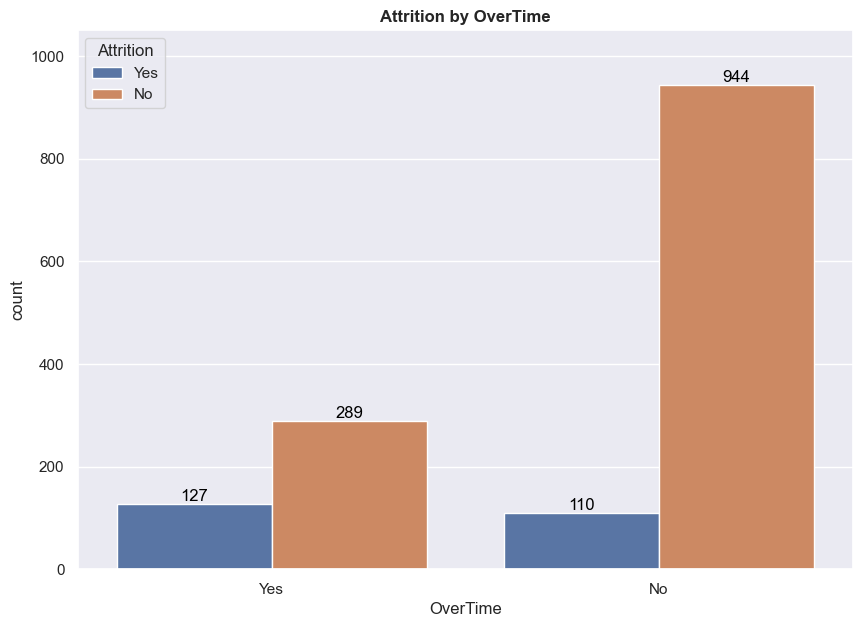

In [36]:
ax= sns.countplot(x='OverTime' ,hue='Attrition', data=df)
plt.title('Attrition by OverTime', weight='bold')
plt.ylim(0,1050)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=12, color='black')
plt.show()

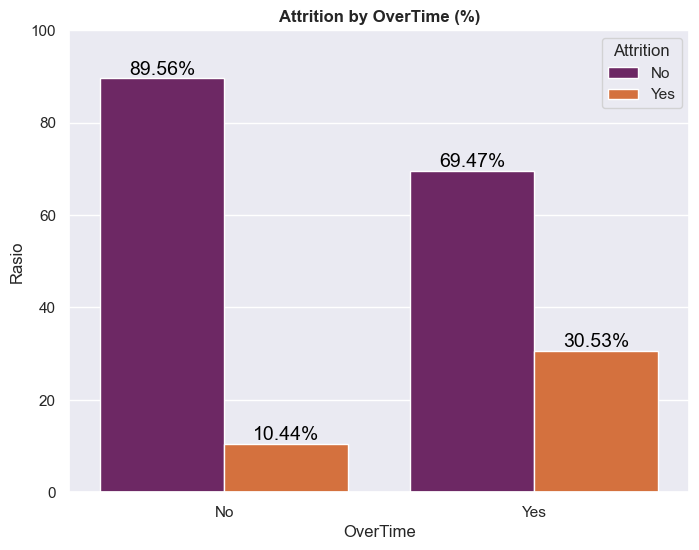

In [37]:
df_group = df.groupby('OverTime').size().reset_index(name='Total')
df_group4=df.groupby(['OverTime','Attrition']).size().reset_index(name='Jumlah')
df_gab4 = df_group4.merge(df_group, on='OverTime', how='left')
df_gab4['Rasio']= round((df_gab4['Jumlah']/df_gab4['Total'])*100, 2)

plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df_gab4, x='OverTime', y='Rasio', hue='Attrition', palette='inferno')
plt.title('Attrition by OverTime (%)', weight='bold')
plt.ylim(0,100)

#memberikan label value otomatis
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=14, color='black')
       
plt.show()

Ternyata karaywan yang mendapatkan jam tambahan kerja berpengaruh terhadap keputusan untuk memilih keluar dari perusahaan

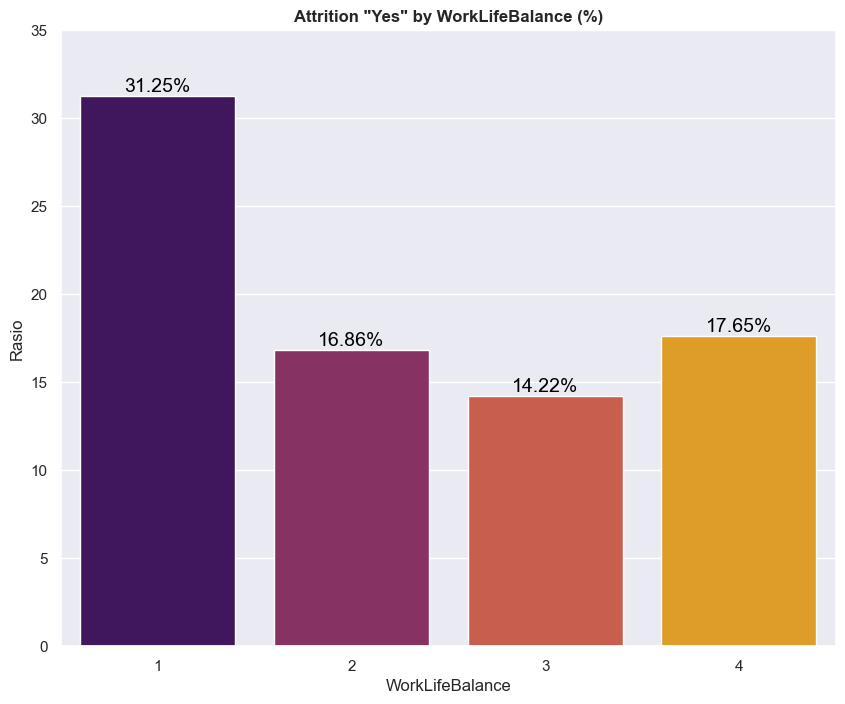

In [38]:
# Calculate and visualize Attrition by WorkLifeBalance

df_group = df.groupby('WorkLifeBalance').size().reset_index(name='Total')
df_group71 = df.groupby(['WorkLifeBalance', 'Attrition']).size().reset_index(name='Jumlah')
df_gab71 = df_group71.merge(df_group, on='WorkLifeBalance', how='left')
df_gab71['Rasio'] = round((df_gab71['Jumlah'] / df_gab71['Total']) * 100, 2)

# Filter hanya baris dengan Attrition 'Yes'
df_gab71_yes = df_gab71[df_gab71['Attrition'] == 'Yes']

plt.figure(figsize=(10, 8))
ax = sns.barplot(data=df_gab71_yes, x='WorkLifeBalance', y='Rasio', palette='inferno')
plt.title('Attrition "Yes" by WorkLifeBalance (%)', weight='bold')
plt.ylim(0, 35)

# Automatically label the values on the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=14, color='black')

plt.show()

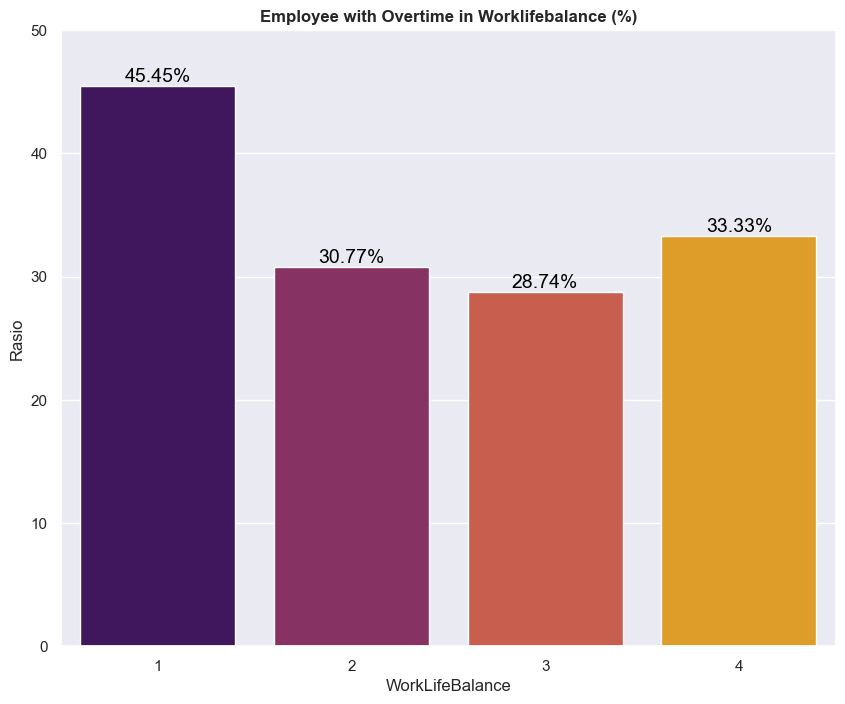

In [39]:
# Calculate and visualize Attrition by WorkLifeBalance
nhg = df[df['OverTime']=='Yes']

df_group = nhg.groupby('WorkLifeBalance').size().reset_index(name='Total')
df_group7 = nhg.groupby(['WorkLifeBalance', 'Attrition']).size().reset_index(name='Jumlah')
df_gab7 = df_group7.merge(df_group, on='WorkLifeBalance', how='left')
df_gab7['Rasio'] = round((df_gab7['Jumlah'] / df_gab7['Total']) * 100, 2)

# Filter hanya baris dengan Attrition 'Yes'
df_gab7_yes = df_gab7[df_gab7['Attrition'] == 'Yes']

plt.figure(figsize=(10, 8))
ax = sns.barplot(data=df_gab7_yes, x='WorkLifeBalance', y='Rasio', palette='inferno')
plt.title('Employee with Overtime in Worklifebalance (%)', weight='bold')
plt.ylim(0, 50)

# Automatically label the values on the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=14, color='black')

plt.show()

## Business Travel

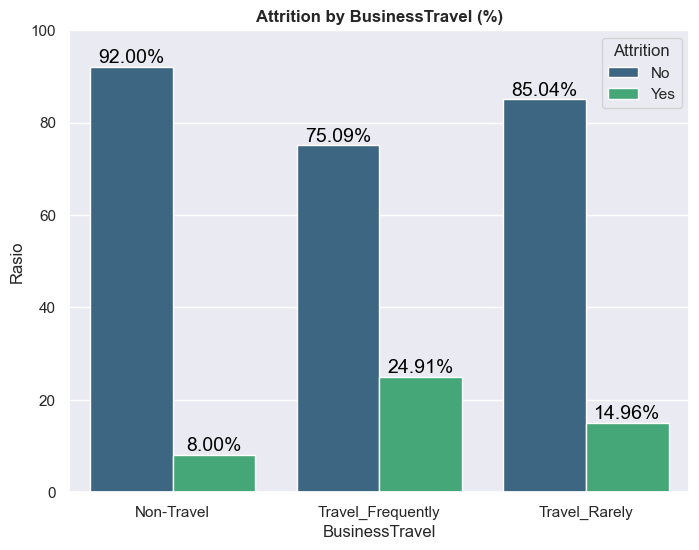

In [40]:
df_group = df.groupby('BusinessTravel').size().reset_index(name='Total')
df_group5=df.groupby(['BusinessTravel','Attrition']).size().reset_index(name='Jumlah')
df_gab5 = df_group5.merge(df_group, on='BusinessTravel', how='left')
df_gab5['Rasio']= round((df_gab5['Jumlah']/df_gab5['Total'])*100, 2)

plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df_gab5, x='BusinessTravel', y='Rasio', hue='Attrition', palette='viridis')
plt.title('Attrition by BusinessTravel (%)', weight='bold')
plt.ylim(0,100)

#memberikan label value otomatis
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=14, color='black')
       
plt.show()

#### Business Travel-Frequenly by Gender

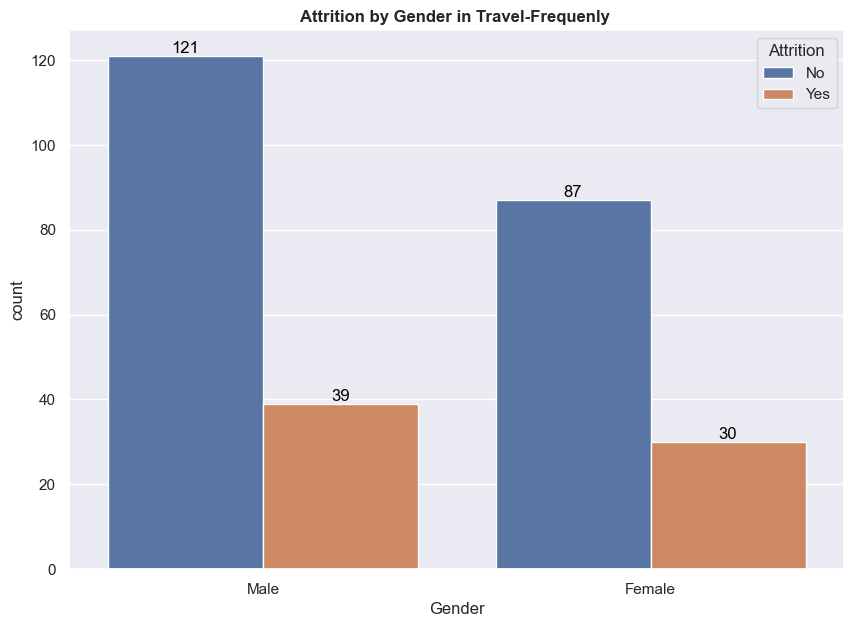

In [41]:
uhb = df[df['BusinessTravel']=='Travel_Frequently']

ax= sns.countplot(x='Gender' ,hue='Attrition', data=uhb)
plt.title('Attrition by Gender in Travel-Frequenly ', weight='bold')
plt.ylim(0,127)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=12, color='black')
plt.show()

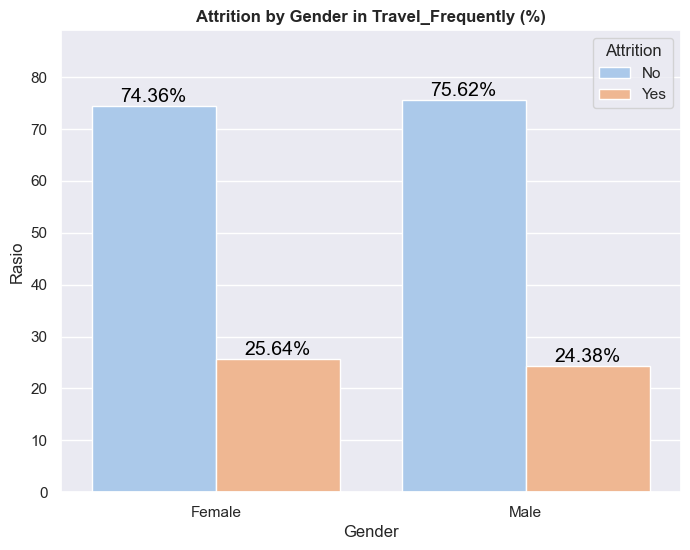

In [42]:
uhb = df[df['BusinessTravel']=='Travel_Frequently']

df_group = uhb.groupby('Gender').size().reset_index(name='Total')
df_group51=uhb.groupby(['Gender','Attrition']).size().reset_index(name='Jumlah')
df_gab51 = df_group51.merge(df_group, on='Gender', how='left')
df_gab51['Rasio']= round((df_gab51['Jumlah']/df_gab51['Total'])*100, 2)

#df_gab11_yes = df_gab51[df_gab51['Attrition'] == 'Yes']
colors = sns.color_palette("pastel")

plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df_gab51, x='Gender', y='Rasio', hue='Attrition', palette=colors)
plt.title('Attrition by Gender in Travel_Frequently (%)', weight='bold')
plt.ylim(0,89)

#memberikan label value otomatis
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=14, color='black')
       
plt.show()

#### Business Travel-Frequenly by Mariatal Status

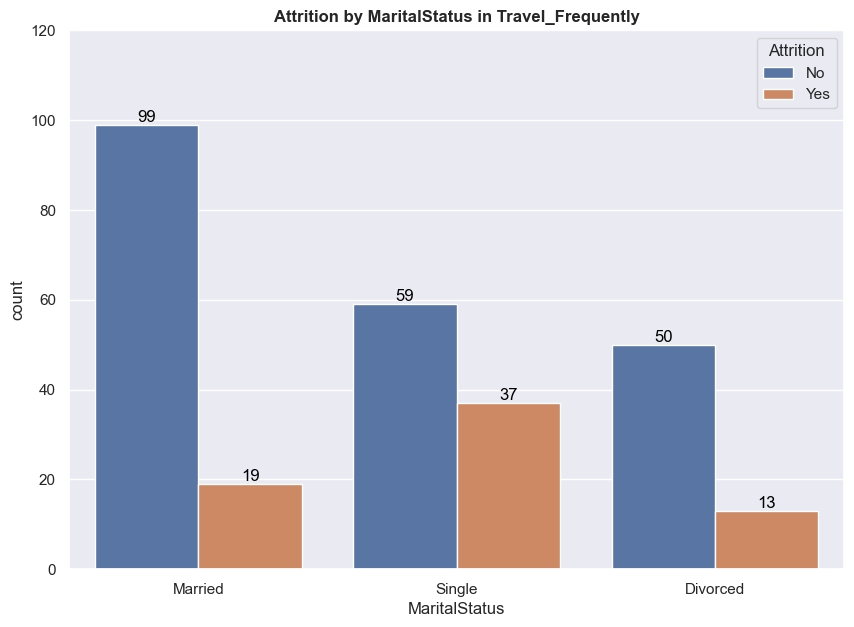

In [43]:
uhb = df[df['BusinessTravel']=='Travel_Frequently']

ax= sns.countplot(x='MaritalStatus' ,hue='Attrition', data=uhb)
plt.title('Attrition by MaritalStatus in Travel_Frequently', weight='bold')
plt.ylim(0,120)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=12, color='black')
plt.show()

#### Attrition by MariatalStatus in Travel_Frequently 

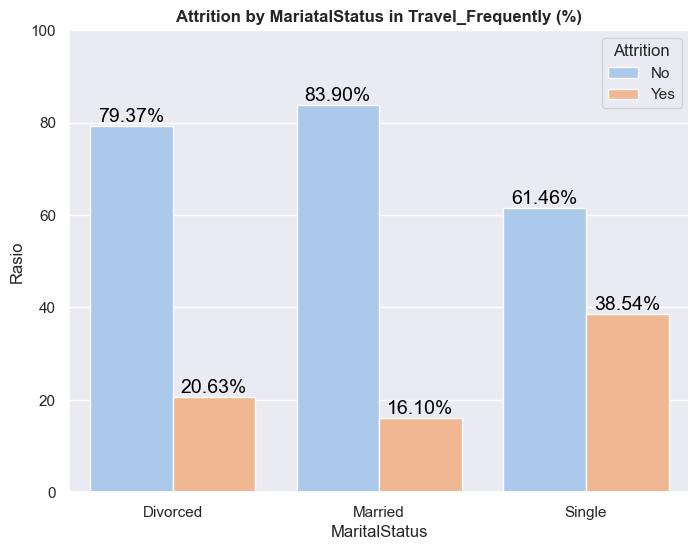

In [44]:
uhb = df[df['BusinessTravel']=='Travel_Frequently']

df_group = uhb.groupby('MaritalStatus').size().reset_index(name='Total')
df_group53=uhb.groupby(['MaritalStatus','Attrition']).size().reset_index(name='Jumlah')
df_gab53 = df_group53.merge(df_group, on='MaritalStatus', how='left')
df_gab53['Rasio']= round((df_gab53['Jumlah']/df_gab53['Total'])*100, 2)

#df_gab13_yes = df_gab53[df_gab53['Attrition'] == 'Yes']

plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df_gab53, x='MaritalStatus', y='Rasio', hue='Attrition', palette='pastel')
plt.title('Attrition by MariatalStatus in Travel_Frequently (%)', weight='bold')
plt.ylim(0,100)

#memberikan label value otomatis
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=14, color='black')
       
plt.show()

#### BusinessTravel General (JobSatisfaction)

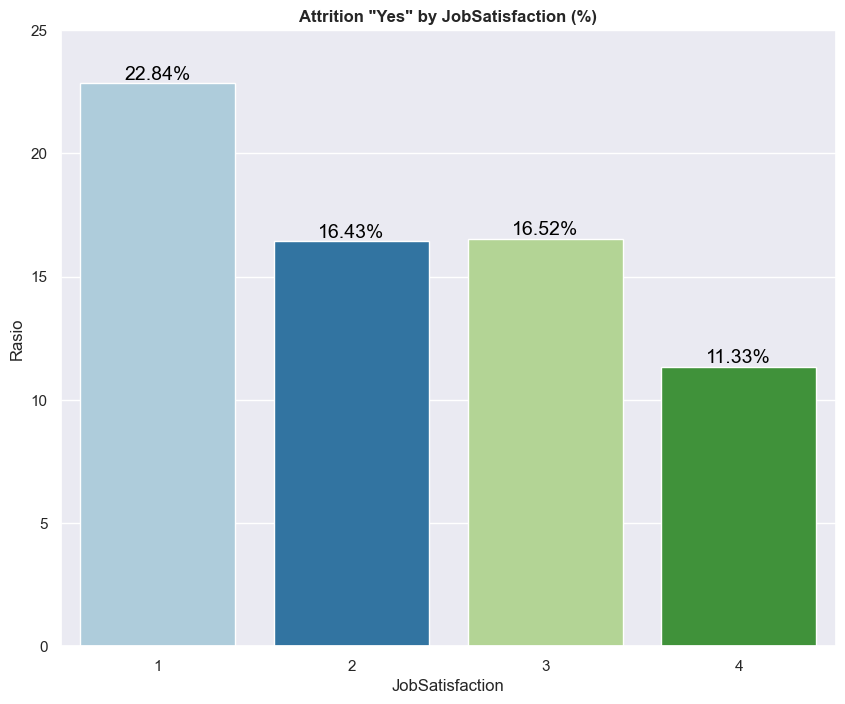

In [45]:
# Calculate and visualize Attrition by BusinessTravel General (JobSatisfaction)

df_group = df.groupby('JobSatisfaction').size().reset_index(name='Total')
df_group81 = df.groupby(['JobSatisfaction', 'Attrition']).size().reset_index(name='Jumlah')
df_gab81 = df_group81.merge(df_group, on='JobSatisfaction', how='left')
df_gab81['Rasio'] = round((df_gab81['Jumlah'] / df_gab81['Total']) * 100, 2)

# Filter hanya baris dengan Attrition 'Yes'
df_gab81_yes = df_gab81[df_gab81['Attrition'] == 'Yes']

plt.figure(figsize=(10, 8))
ax = sns.barplot(data=df_gab81_yes, x='JobSatisfaction', y='Rasio', palette='Paired')
plt.title('Attrition "Yes" by JobSatisfaction (%)', weight='bold')
plt.ylim(0, 25)

# Automatically label the values on the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=14, color='black')

plt.show()

#### BusinessTravel = Travel_Frequently & Travel_Rarely (JobSatisfaction)

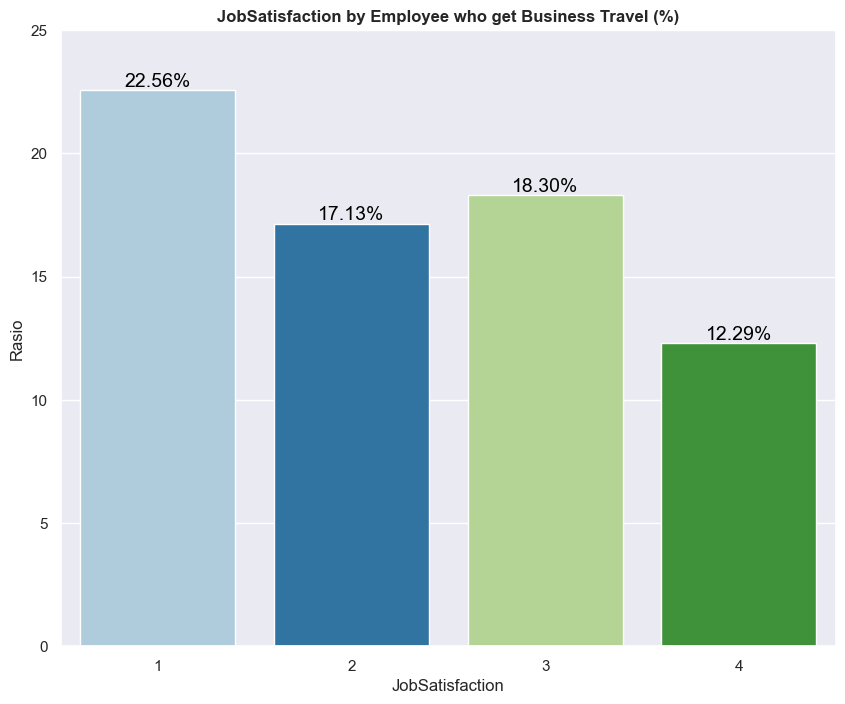

In [46]:
# Calculate and visualize Attrition by BusinessTravel = Travel_Frequently & Travel_Rarely (JobSatisfaction)
dfg = df[(df['BusinessTravel']=='Travel_Frequently') | (df['BusinessTravel']=='Travel_Rarely')]

df_group = dfg.groupby('JobSatisfaction').size().reset_index(name='Total')
df_group8 = dfg.groupby(['JobSatisfaction', 'Attrition']).size().reset_index(name='Jumlah')
df_gab8 = df_group8.merge(df_group, on='JobSatisfaction', how='left')
df_gab8['Rasio'] = round((df_gab8['Jumlah'] / df_gab8['Total']) * 100, 2)

# Filter hanya baris dengan Attrition 'Yes'
df_gab8_yes = df_gab8[df_gab8['Attrition'] == 'Yes']

plt.figure(figsize=(10, 8))
ax = sns.barplot(data=df_gab8_yes, x='JobSatisfaction', y='Rasio', palette='Paired')
plt.title('JobSatisfaction by Employee who get Business Travel (%)', weight='bold')
plt.ylim(0, 25)

# Automatically label the values on the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=14, color='black')

plt.show()

### JobInvolvement

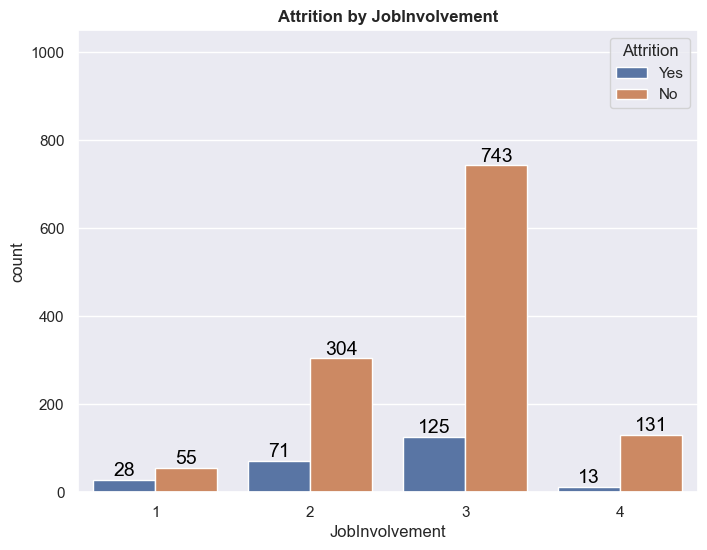

In [47]:
plt.figure(figsize=(8, 6))
ax= sns.countplot(x='JobInvolvement' ,hue='Attrition', data=df)
plt.title('Attrition by JobInvolvement', weight='bold')
plt.ylim(0,1050)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=14, color='black')
plt.show()

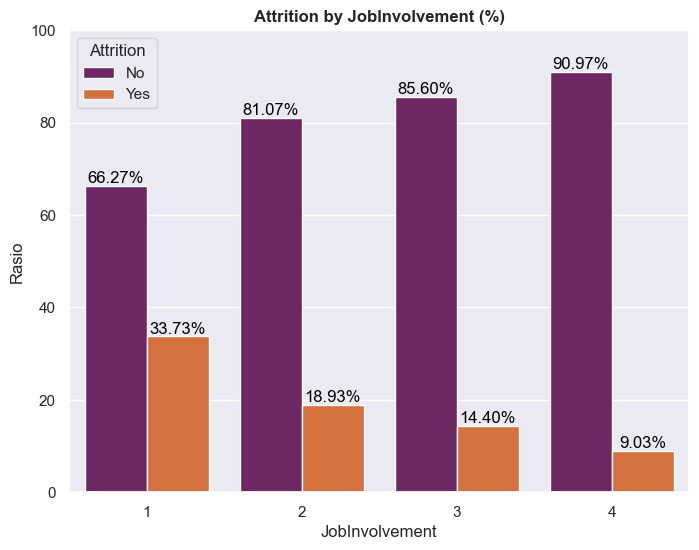

In [48]:
df_group = df.groupby('JobInvolvement').size().reset_index(name='Total')
df_group5=df.groupby(['JobInvolvement','Attrition']).size().reset_index(name='Jumlah')
df_gab5 = df_group5.merge(df_group, on='JobInvolvement', how='left')
df_gab5['Rasio']= round((df_gab5['Jumlah']/df_gab5['Total'])*100, 2)

plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df_gab5, x='JobInvolvement', y='Rasio', hue='Attrition', palette='inferno')
plt.title('Attrition by JobInvolvement (%)', weight='bold')
plt.ylim(0,100)

#memberikan label value otomatis
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=12, color='black')
       
plt.show()

Dari jumlah karyawan yang terlibat dalam suatu pekerjaan, yang tingkat keterlibatannya paling rendah (1) cenderung lebih banyak yang memutuskan keluar sekitar 33.27%

### JobLevel

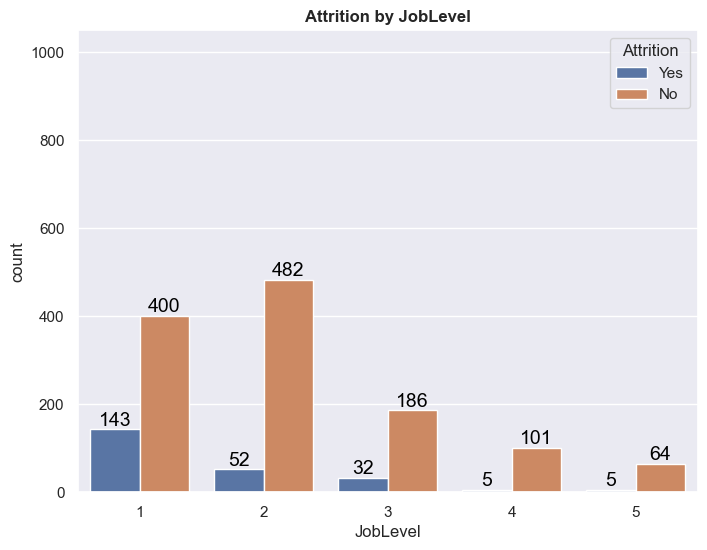

In [49]:
plt.figure(figsize=(8, 6))
ax= sns.countplot(x='JobLevel' ,hue='Attrition', data=df)
plt.title('Attrition by JobLevel', weight='bold')
plt.ylim(0,1050)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=14, color='black')
plt.show()

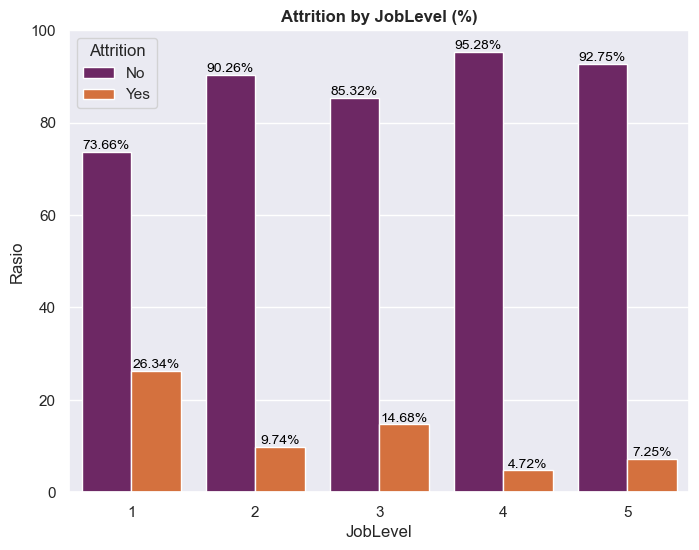

In [50]:
df_group = df.groupby('JobLevel').size().reset_index(name='Total')
df_group6=df.groupby(['JobLevel','Attrition']).size().reset_index(name='Jumlah')
df_gab6 = df_group6.merge(df_group, on='JobLevel', how='left')
df_gab6['Rasio']= round((df_gab6['Jumlah']/df_gab6['Total'])*100, 2)

plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df_gab6, x='JobLevel', y='Rasio', hue='Attrition', palette='inferno')
plt.title('Attrition by JobLevel (%)', weight='bold')
plt.ylim(0,100)

#memberikan label value otomatis
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10, color='black')
       
plt.show()

Karywana dengan level rendah cendrung lebih banyak yang keluar, mungkin hal ini bisa terjadi karena adanya tawaran yang lebih menaraik dari perusahaan lain disamping mereka juga ingin meningkatkan jenjang karir

### MonthlyIncome

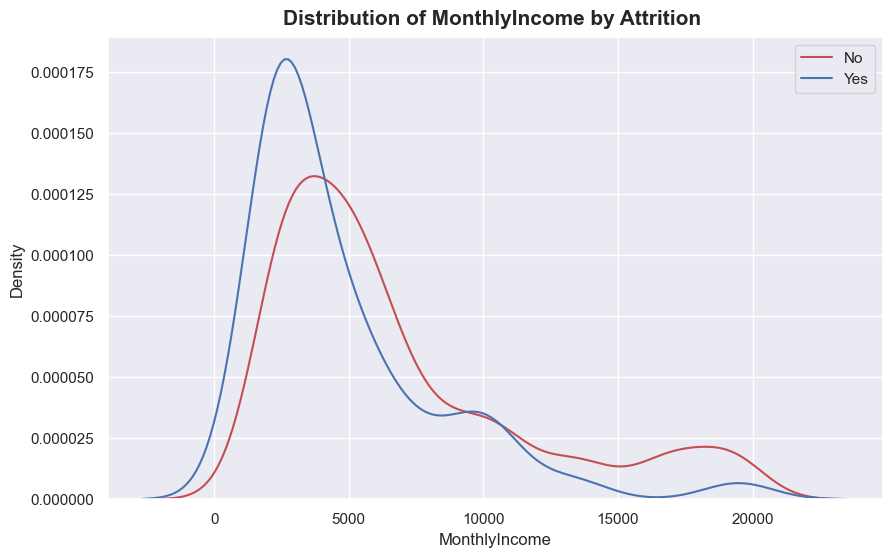

In [51]:
a= df[df['Attrition']=='No']['MonthlyIncome'].values 
b= df[df['Attrition']=='Yes']['MonthlyIncome'].values

plt.figure(figsize=(10,6))
plt.title('Distribution of MonthlyIncome by Attrition ', fontsize=15, weight='bold', y=1.01)
sns.kdeplot(x=a, label='No', color='r')
sns.kdeplot(x=b, label='Yes', color='b')
plt.xlabel('MonthlyIncome')
plt.legend(title='Attrition')

# Menambahkan garis lurus vertikal pada nilai 2500
#plt.axvline(x=4110, color='g', linestyle='--', label='Threshold')
plt.legend()

# Menambahkan garis lurus vertikal pada nilai 2500


plt.legend()

plt.show()

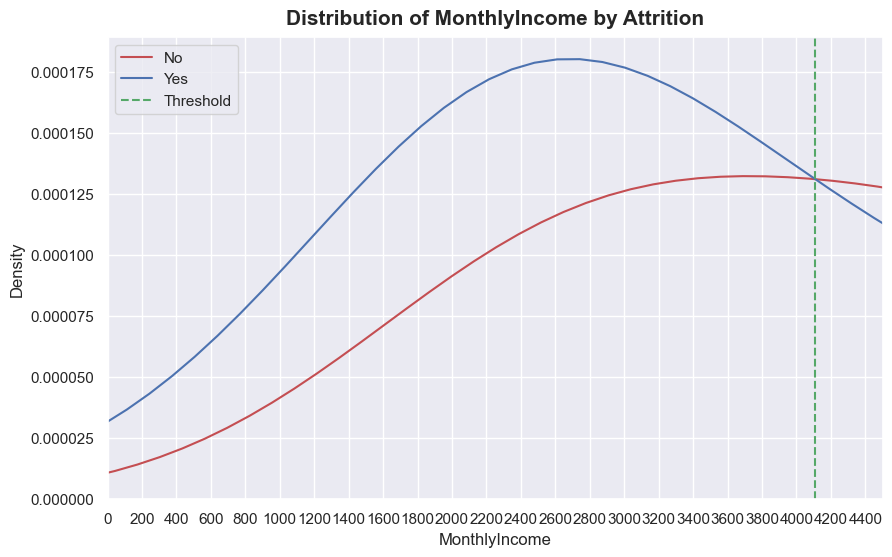

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

a = df[df['Attrition'] == 'No']['MonthlyIncome'].values
b = df[df['Attrition'] == 'Yes']['MonthlyIncome'].values

plt.figure(figsize=(10, 6))
plt.title('Distribution of MonthlyIncome by Attrition', fontsize=15, weight='bold', y=1.01)
sns.kdeplot(x=a, label='No', color='r')
sns.kdeplot(x=b, label='Yes', color='b')
plt.xlabel('MonthlyIncome')
plt.legend(title='Attrition')

# Mengatur batasan sumbu X pada rentang 0 hingga 4500
x_ticks = np.arange(0, 4501, 200)
plt.xlim(0, 4500)
plt.xticks(x_ticks)

# Menambahkan garis lurus vertikal pada nilai 2500
plt.axvline(x=4110, color='g', linestyle='--', label='Threshold')
plt.legend()

plt.show()


Karyawan dengan gaji di bawah $4200 lebih banyak yang memutuskan untuk keluar

# Business Recommendation

1. **Melakukan performance appraisal secara rutin/berkala**: Ini adalah praktik di mana perusahaan secara teratur mengevaluasi kinerja karyawan, biasanya setiap tahun. Penilaian ini membantu dalam memahami sejauh mana karyawan telah mencapai tujuan mereka dan memberikan umpan balik untuk perbaikan.<br>


2. **Memberikan reward atau bonus bagi karyawan yang memiliki performa baik dan loyal kepada perusahaan**: Dalam hal ini, perusahaan memberikan penghargaan berupa bonus atau insentif kepada karyawan yang telah menunjukkan performa yang luar biasa dan loyalitas terhadap perusahaan.<br>

3. **Mengurangi jam lembur bagi karyawan sehingga meminimalkan kemungkinan karyawan untuk keluar**: Langkah ini dapat diambil untuk menghindari kelelahan dan memungkinkan keseimbangan kerja-hidup yang lebih baik bagi karyawan. Ini dapat membantu mempertahankan karyawan yang lebih puas.<br>

4. **Melakukan analisis ulang terhadap beban kerja karyawan**: Perusahaan harus secara rutin mengevaluasi beban kerja karyawan untuk memastikan bahwa tugas dan tanggung jawab yang diberikan sesuai dengan kapasitas mereka. Ini dapat membantu mencegah stres berlebihan dan kelelahan.<br>

5. **Pengembangan potensi karyawan melalui pelatihan yang dibutuhkan**: Memberikan pelatihan dan pengembangan yang sesuai untuk karyawan adalah cara untuk meningkatkan kompetensi mereka. Ini membantu karyawan merasa dihargai dan dapat meningkatkan kualitas kerja mereka.<br>

6. **Mempertimbangkan penerapan Employee Wellness Program guna meningkatkan tingkat produktivitas karyawan**: Program kesejahteraan karyawan dapat mencakup berbagai inisiatif seperti program kesehatan, dukungan psikologis, dan manajemen stres. Ini bertujuan untuk meningkatkan kesejahteraan karyawan, yang pada gilirannya dapat meningkatkan produktivitas mereka.<br>

Semua praktik ini penting dalam membangun lingkungan kerja yang sehat, memotivasi karyawan, dan meminimalkan turnover karyawan. Dengan demikian, organisasi dapat mencapai kinerja yang lebih baik dan tetap kompetitif di pasar.